Atomic Frequency Comb Efficiency Modelling
Finley Giles-Book - fdg2@hw.ac.uk - 30/11/2020

Modelling the efficiency equations for impedance-matched cavity enhanced AFC storage

Based off paper 4 from README

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#This model takes into a count the imperfect background radiation.
def eta_cavity(d_tilde,eta_depth,R2,d0): # cavity efficiency model
    
    eta = eta_depth * np.exp(-d0) / (1 + (1-R2)/(4*d_tilde))**4
    
    return eta

def eta_depth(F):       # eta depth same for AFC Efficiency model, assumes square teeth
    
    eta = np.sinc(1/F)**2
    
    return eta

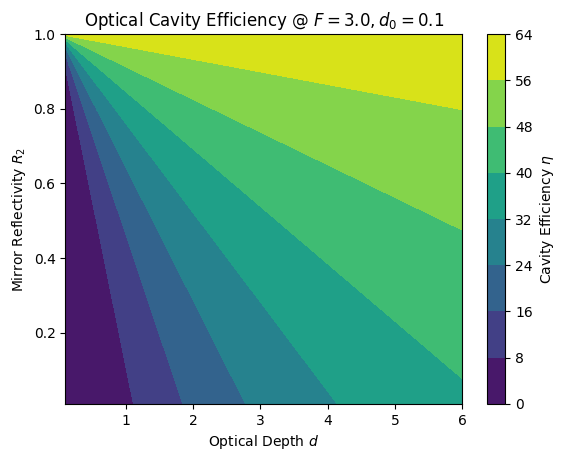

In [2]:
d0 = 0.1                           # Background optical power
d = np.linspace(0.1,6,100)        # Optical depth 
F = 3          # Finesse of AFC
d_tilde = d/F   # Effective optical depth
R2 = np.linspace(0.01,1,100)      # Cavity round trip losses

dv, R2v = np.meshgrid(d,R2)

d_tildev = dv/F

Z_d = eta_cavity(d_tildev,eta_depth(F),R2v,d0)

fig1 = plt.figure()
plt.title(r'Optical Cavity Efficiency @ $F = %0.1f, d_0 = %0.1f$' %(F, d0))

plt.contourf(dv,R2v,100*Z_d)
#plt.yscale('log')
plt.ylabel(r'Mirror Reflectivity $R_2$')
plt.xlabel(r'Optical Depth $d$')
cbar1 = plt.colorbar(plt.contourf(dv,R2v,100*Z_d))
cbar1.set_label(r'Cavity Efficiency $\eta$')

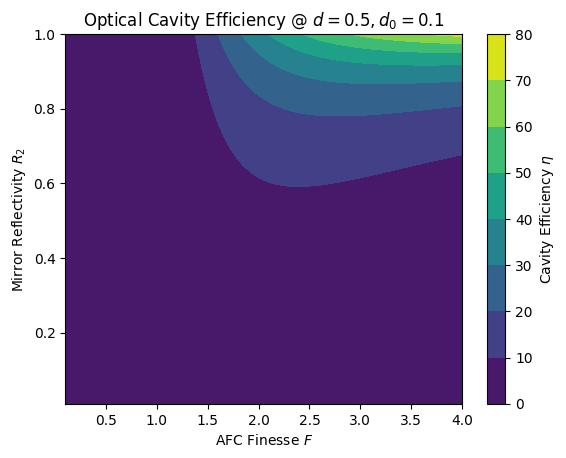

In [3]:
d0 = 0.1                         # Background optical power
d = 0.5                            # Optical depth 
F = np.linspace(0.1,4,100)      # Finesse of AFC
d_tilde = d/F                    # Effective optical depth
R2 = np.linspace(0.01,1,100)    # Cavity round trip losses

Fv, R2v = np.meshgrid(F,R2)    # Meshgrid of F and eps

d_tildev = d/Fv

Z_F = eta_cavity(d_tildev,eta_depth(Fv),R2v,d0)

fig2 = plt.figure()
plt.title(r'Optical Cavity Efficiency @ $d = %0.1f, d_0 = %0.1f$' %(d, d0))

plt.contourf(Fv,R2v,100*Z_F)
#plt.yscale('log')
plt.ylabel(r'Mirror Reflectivity $R_2$')
plt.xlabel(r'AFC Finesse $F$')
cbar2 = plt.colorbar(plt.contourf(Fv,R2v,100*Z_F))
cbar2.set_label(r'Cavity Efficiency $\eta$')

Text(0.5, 0, 'Round Trip Losses')

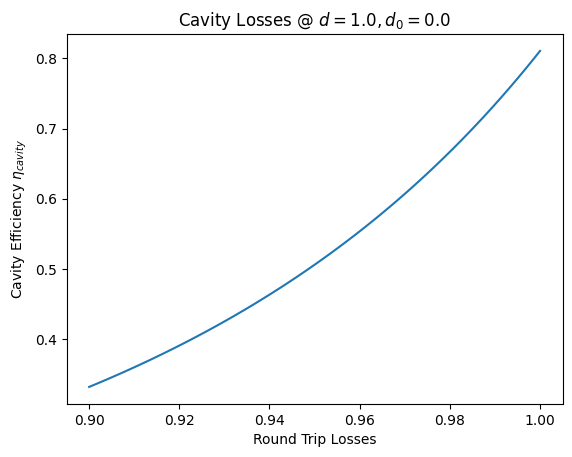

In [4]:
d0 = 0
d = 1
F = 4
d_tilde = 0.1
eps = 0.02              # Loss per round trip from R2 eps=1-R2
R2 = np.linspace(0.9,1,100)

eff_cavity = eta_cavity(d_tilde,eta_depth(F),R2,d0)

fig3 = plt.figure()
plt.title(r'Cavity Losses @ $d = %0.1f, d_0 = %0.1f$' %(d, d0))

plt.plot(R2,eff_cavity)
plt.ylabel(r'Cavity Efficiency $\eta_{cavity}$')
plt.xlabel(r'Round Trip Losses')